# Detección cáncer de mama

## Regresión Logística

In [ ]:
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import lightgbm as lgb
#from sklearn.metrics import plot_confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'sample_data']

wdbc (Breast Cancer Wisconsin (Diagnostic)) es un dataset donado en el año 1995 que describe las características del tumor de mama en diferentes pacientes y si resultó ser un tumor maligno o benigno.
El objetivo es predecir si el tumor será benigno o maligno para nuevos pacientes, dadas las características del tumor.

Primero leo los datos guardados en la carpeta.
Luego elimino la primer columna, que corresponde al ID, por no ser explicativa.

In [ ]:
breastdf = pd.read_csv("https://raw.githubusercontent.com/danielcaba889/Tesis-FCE-UBA---Analisis-de-Regresion-Logistica-para-medir-el-riesgo-de-contraer-cancer-de-mama/main/wdbc.data", header=None) #leo el dataset
breastdf.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breastdf.drop(0,axis=1, inplace = True) #elimino primer columna
breastdf[1] = breastdf[1]=='M' #cambio M por True y B por False

In [ ]:
breastdf.head() #observo como quedó

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breastdf.describe() #resumen numérico de los atributos.

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
breastdf[1].value_counts()

False    357
True     212
Name: 1, dtype: int64

#### Visualizacion de algunas variables
Me permiten ver que existe una relación causa y efecto. Realizo algunos boxplot diferenciando de quienes tienen tumor maligno del benigno.

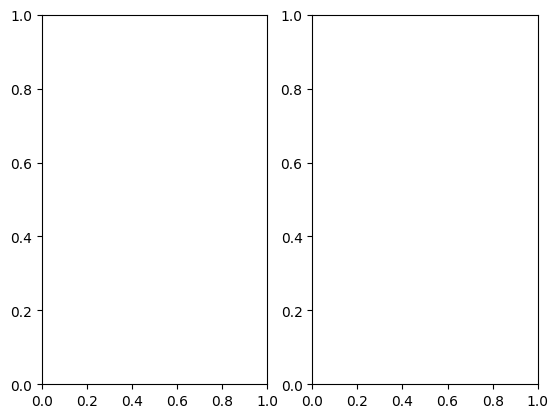

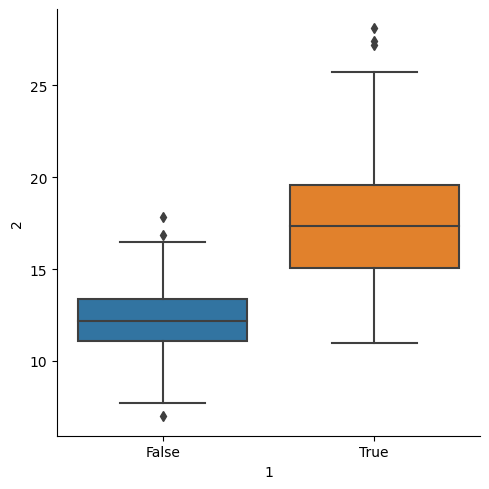

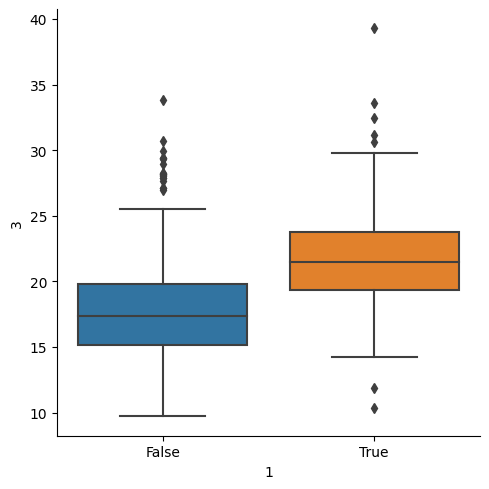

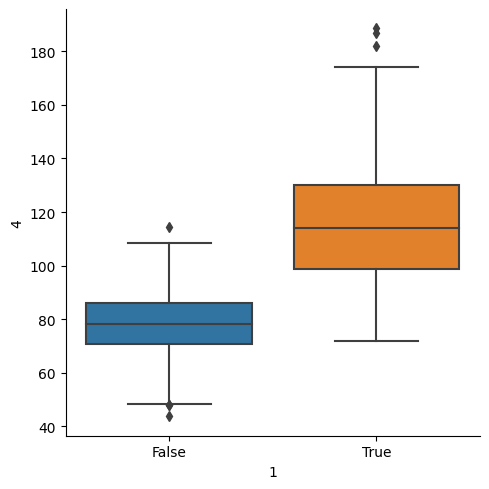

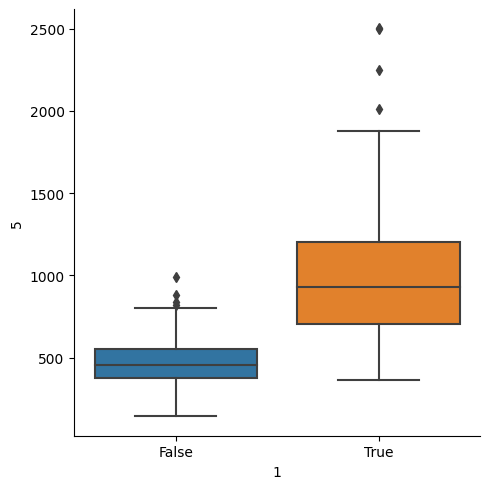

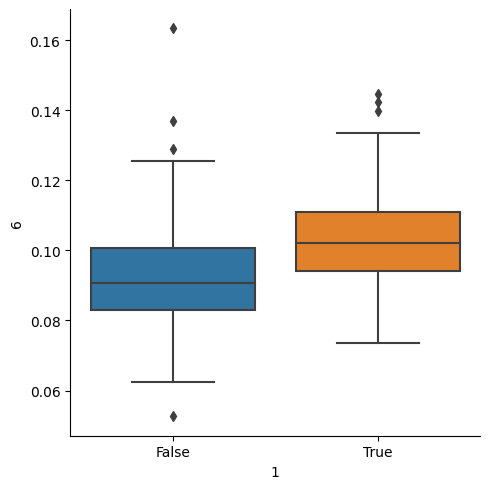

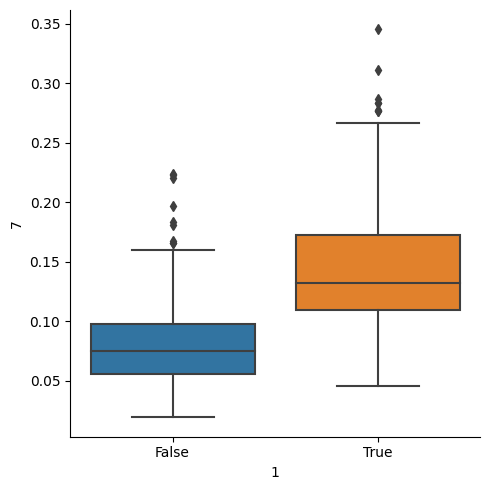

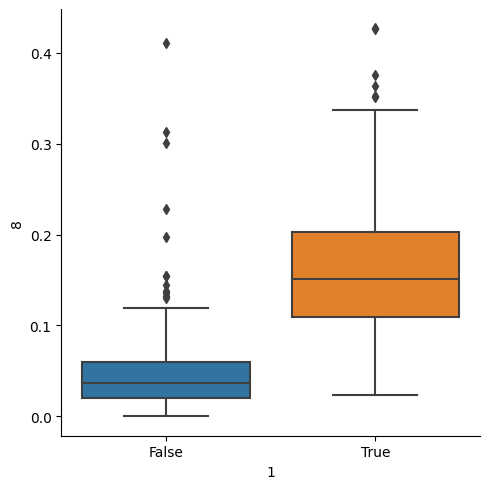

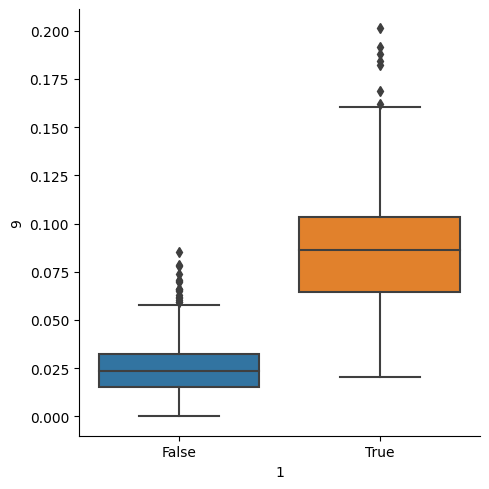

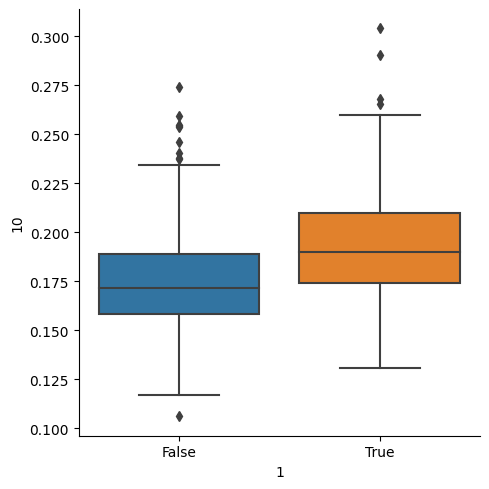

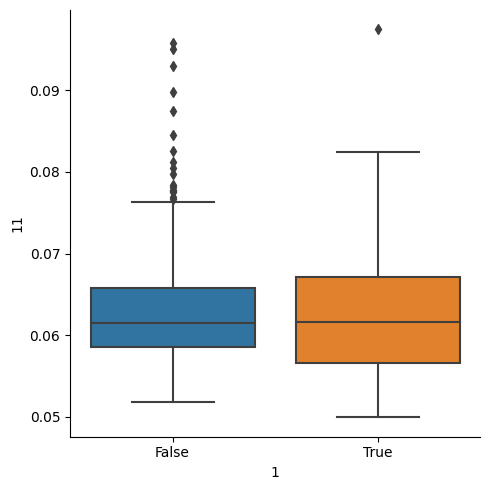

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=2)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=3)#puedo concluir visualmente que la variable 2 suele ser mas alta para los casos malignos
sns.catplot(kind = 'box', data=breastdf, x = 1,y=4)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=5)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=6)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=7)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=8)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=9)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=10)
sns.catplot(kind = 'box', data=breastdf, x = 1,y=11) #no es significativamente mas grande

<BarContainer object of 2 artists>

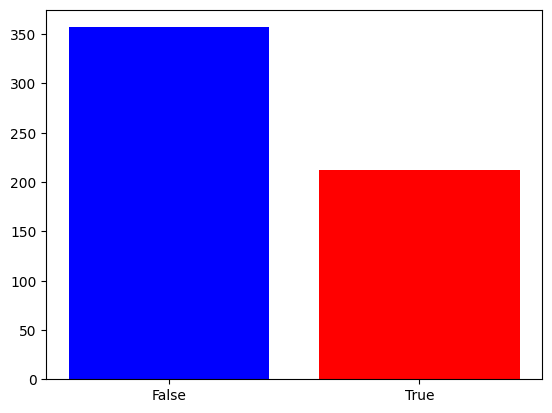

In [ ]:
plt.bar(x = ("False","True"), height=(breastdf[1].value_counts()[0],breastdf[1].value_counts()[1]), color=("blue","red"))

In [ ]:
predict = 1
X = breastdf.drop(predict,axis=1) #llamo X a la matriz con los datos
y= breastdf[predict] #llamo y al vector con los resultados
X,y #veo como quedó

(        2      3       4       5        6        7        8        9       10  \
 0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
 1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
 2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
 3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
 4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
 ..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
 564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
 565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
 566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
 567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
 568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   
 
           11 

## Separo entre set de entrenamiento y set de testeo
esto es para entrenar el modelo con algunos datos y realizar predicciones sobre datos "limpios" (que el modelo nunca vió). si los resultados son buenos, quiere decir que el modelo generaliza bien el problema y no hace overfitting.

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=1)
#X_train: matriz de 455x30 (455 pacientes (80% del total), 30 atributos)
#X_test: 114x30 (114 pacientes(20% del total), 30 atributos)
#y_train: vector 455x1 (resultados de los pacientes del train)
#y_test: vector 114x1 (resultados de los pacientes del test)

#### primero entreno el modelo de regresion logística con los hiperparámetros por default. Más adelante lo optimizo para comparar los resultados.

pestimado = 1/(1+e^-t)
t = Xt.b producto matricial
t = b0+b1x1+b2x2+b3x3+...+b30x30

In [ ]:
model = LogisticRegression(max_iter = 10000) #aumento la cantidad de iteraciones porque sino me da advertencia de que no converge
model.fit(X_train,y_train) #ajusto el modelo con el set de entrenamiento para que python encuentre los mejores parámetros.

LogisticRegression(max_iter=10000)

In [ ]:
print(model.coef_ #estimacion de los betas
,model.intercept_)

[[-0.72882296 -0.14650869  0.45511027 -0.0410624   0.12108594  0.15266643
   0.40980822  0.22733126  0.20259742  0.01474578  0.01978526 -0.4047746
  -0.41964712  0.0827295   0.02887699 -0.04244658  0.05010387  0.03982354
   0.04260751 -0.01043635 -0.12892534  0.33175935  0.14077844  0.01464928
   0.25003036  0.42220215  0.95281012  0.45934065  0.49482129  0.03371412]] [-38.93791187]


In [ ]:
np.e**(model.coef_) #mas facil de interpretar

array([[0.48247655, 0.86371823, 1.5763472 , 0.95976924, 1.12872191,
        1.16493633, 1.50652883, 1.25524561, 1.22457938, 1.01485504,
        1.01998229, 0.66712716, 0.65727872, 1.08624794, 1.02929797,
        0.95844166, 1.05138029, 1.04062712, 1.04352824, 0.98961792,
        0.87903959, 1.39341749, 1.15116957, 1.01475711, 1.2840644 ,
        1.52531683, 2.59298602, 1.58302987, 1.64020509, 1.03428888]])

### StatsModels

In [ ]:
import statsmodels.api as sm
sm_model = sm.Logit(y_train, X_train)
#sm_result = sm_model.fit(maxiter=10000)
#sm_result.summary()

### validación cruzada
método para verificar capacidad predictiva del modelo dentro del set de entrenamiento
divido el set en k folds, entreno con k-1, hago predicción con el faltante, calculo medida de performance(score/f1score)
output: k medidas de performance distintas. uso el promedio.

In [ ]:
cross_val = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, verbose=True) #calculo score (medida de performance) con 5 folds
f1_cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring = 'f1', n_jobs=-1,verbose=True) #f1 como medida de performance
print(model.score(X_test, y_test), cross_val, cross_val.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


BrokenProcessPool: ignored

In [ ]:
cv_scores_table = pd.DataFrame({"cross val score":cross_val, "cross val f1": f1_cross_val})
mean_scores_table = pd.DataFrame({"mean score": [cross_val.mean()]})
test_scores_table = pd.DataFrame({"test score": [model.score(X_test, y_test)]})
print(cv_scores_table, "\n") #atencion, no son los mismos folds?
print(mean_scores_table, "\n")
print(test_scores_table)


   cross val score  cross val f1
0         0.901099      0.865672
1         0.923077      0.892308
2         0.956044      0.939394
3         0.978022      0.971429
4         0.967033      0.955224 

   mean score
0    0.945055 

   test score
0    0.947368


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, recall_score, precision_score
train_predict = cross_val_predict(model, X_train, y_train,cv = 5)
train_f1_score = f1_score(y_train, train_predict)
train_recall_score = recall_score(y_train,train_predict)
train_precision_score = precision_score(y_train, train_predict)
print(train_predict)
cv_score_mean = cross_val_score(model, X_train, y_train).mean()

train_scores_table = {"cv mean score": [cv_score_mean],
                     "f1 score": [train_f1_score],
                     "recall": [train_recall_score],     #porcentaje de los positivos correctamente detectados
                     "precision": [train_precision_score]# porcentaje de los que predije positivo que realmente lo son
                     }
pd.DataFrame(train_scores_table)

[ True  True False False False False False  True  True False False  True
  True  True  True  True False False False  True False  True  True False
 False  True  True  True False  True False  True False False False  True
 False False False False False False False False False False False False
 False False False False  True  True  True False False False False  True
 False False False False False False False False False False False  True
  True False  True False False False  True  True  True False False  True
  True False  True False False False  True False False False False  True
 False False False False  True False False False False False False False
  True False  True False False  True  True False  True False False  True
  True False  True  True False False False False False False False  True
 False False  True  True  True  True False  True False False False False
  True False False False False False False False  True False False False
  True  True False False  True  True  True False Fa

,cv mean score,f1 score,recall,precision
0,0.945055,0.925373,0.911765,0.939394


### Matriz de confusión

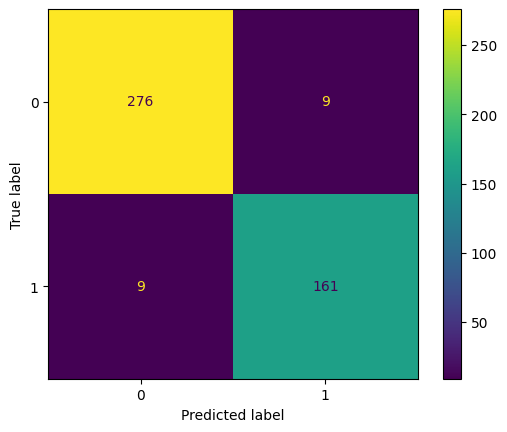

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, model.predict(X_train))).plot()

In [ ]:
from sklearn.metrics import confusion_matrix
cv_confusion=confusion_matrix(y_train, train_predict)
TN = cv_confusion[0][0]
FP = cv_confusion[0][1]
FN = cv_confusion[1][0]
TP = cv_confusion[1][1]

confusion_table = {
    "0" : [TN,FN],
    "1" : [FP,TP]
}
pd.DataFrame(confusion_table)

,0,1
0,275,10
1,15,155


### Optimizo el modelo

In [ ]:
params = {"penalty":["l1","l2","elasticnet","none"],
    "C": np.logspace(-4,4,20),
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]#,    "max_iter":[100, 500, 1000, 5000]
}

### GridSearchCV
ajusta un modelo por cada combinacion de hiperparámetros
osea: 4x20x5x4x5 = 8000
.Me quedo con el que mayor f1 score tenga

In [ ]:
searchcv = GridSearchCV(model, param_grid = params, cv = 5, verbose = True, n_jobs=-1, scoring= "f1")

In [ ]:
optimal_model = searchcv.fit(X_train,y_train) #hago todas las combinaciones
                                                                #advertencia?

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

In [ ]:
optimal_model.best_params_
#Los hiperparámetros óptimos encontrados fueron:
#{'C': 0.0001,
 #'max_iter': 1000,
 #'penalty': 'none',
 #'solver': 'lbfgs'}

{'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
best_C, best_penalty, best_solver= optimal_model.best_params_["C"] , optimal_model.best_params_["penalty"], optimal_model.best_params_["solver"]

mejores_parametros = {"Hiperparámetro: " : ["C","penalty","solver"], #,"max_iter"],
                     "Valor": [best_C, best_penalty, best_solver]#, best_max_iter
                     }

tabla_mejores_parametros = pd.DataFrame(mejores_parametros)
tabla_mejores_parametros

,Hiperparámetro:,Valor
0,C,78.475997
1,penalty,l1
2,solver,liblinear


### Construyo modelo con los mejores parámetros

In [ ]:
best_parameters_model = LogisticRegression(penalty = best_penalty, C=best_C, solver = best_solver, max_iter=10000)#, max_iter = best_max_iter
best_parameters_model.fit(X_train,y_train) #ajusto modelo a los datos
best_cv_predict = cross_val_predict(best_parameters_model, X_train, y_train) #ojo, folds distintos
best_params_cv_score_mean = cross_val_score(best_parameters_model, X_train, y_train).mean()
best_params_f1_score = f1_score(y_train, best_cv_predict) #ojo, folds distintos

print( "f1 score ",f1_score(y_train, best_cv_predict),"\nbest params f1 score" , best_params_cv_score_mean)
comparacion = {"modelo": ["Parámetros por default", "Parámetros óptimos"],
              "Score": [cv_score_mean, best_params_cv_score_mean],
              "F1": [train_f1_score,best_params_f1_score ] }

print (pd.DataFrame(comparacion)) #vemos que la precisión aumentó bastante

f1 score  0.9523809523809523 
best params f1 score 0.964835164835165
                   modelo     Score        F1
0  Parámetros por default  0.945055  0.925373
1      Parámetros óptimos  0.964835  0.952381


### Matriz de confusión
##### con los mejores parámetros

In [ ]:

best_parameters_model.predict(X_train)

array([ True,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False,

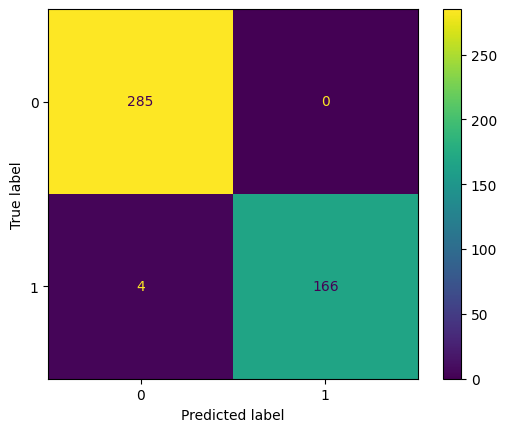

In [ ]:

train_cm = confusion_matrix(y_train, best_parameters_model.predict(X_train))
ConfusionMatrixDisplay(confusion_matrix = train_cm).plot()

In [ ]:
best_parameters_cv_confusion=confusion_matrix(y_train,best_cv_predict)
TN = best_parameters_cv_confusion[0][0]
FP = best_parameters_cv_confusion[0][1]
FN = best_parameters_cv_confusion[1][0]
TP = best_parameters_cv_confusion[1][1]

confusion_table = {
    "0" : [TN,FN],
    "1" : [FP,TP]
}
pd.DataFrame(confusion_table)

,0,1
0,279,6
1,10,160


### Con mi modelo optimizado realizo las predicciones en el test set

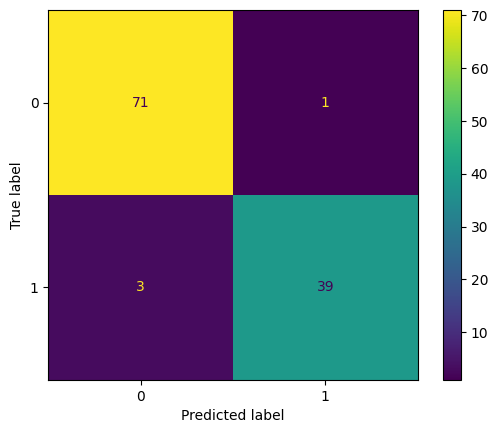

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
predictions = best_parameters_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

recall_precision_table = {"recall":[recall],
                         "precision": [precision]}
pd.DataFrame(recall_precision_table) #Recall y Precision en el test set. Predice bastante bien.

,recall,precision
0,0.928571,0.975


### Umbral de decisión
el modelo, por default, decide que si el score>0 predice maligno, si score<0 predice benigno
coincide con la probabilidad de 0.5
si la prob de ser maligno >0.5 predice maligno, sino, maligno.
puedo cambiar el umbral de decision, para ser mas conservador y reducir falsos negativos. inevitablemente creceran los falsos positivos

In [ ]:
y_scores = best_parameters_model.decision_function(X_test)
#por default si score>0 => predice True
threshold = 0
y_scores>threshold # coincide con best_parameters_model.predict(X_test)

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False])

In [ ]:
best_parameters_model.predict(X_test)

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False])

### cambio threshold

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold =  precision_recall_curve(y_test, y_scores)

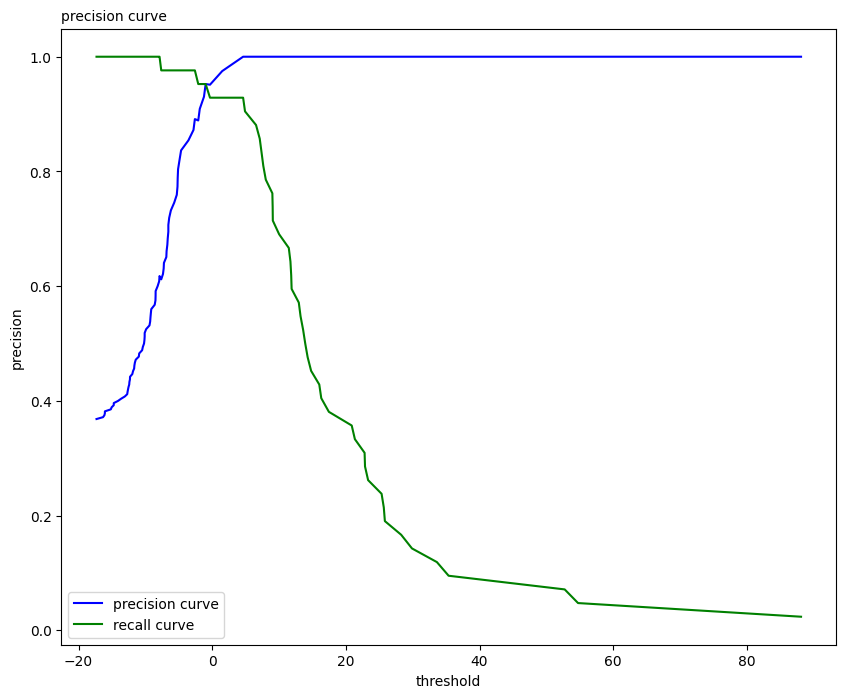

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(threshold, precision[:-1] , "b-", label = "precision curve")
plt.plot(threshold, recall[:-1], "g-", label = "recall curve")
plt.xlabel("threshold")
plt.ylabel("precision")
plt.title("precision curve", fontdict= {'fontsize':10}, loc='left')
plt.legend()

### relación entre recall y precision

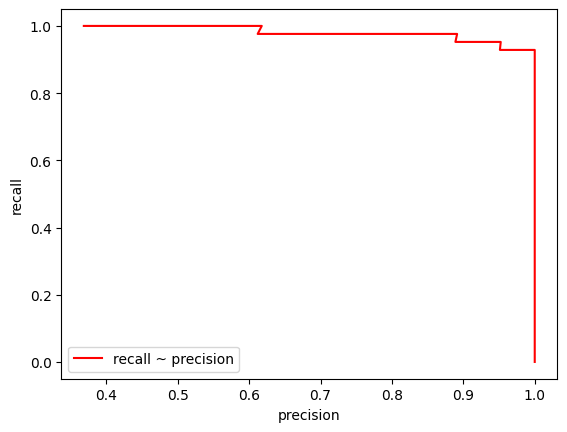

In [ ]:
plt.plot(precision, recall, c = "r", label = "recall ~ precision")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc = "lower left")

### curva ROC

Text(0.5, 1.0, 'ROC curve')

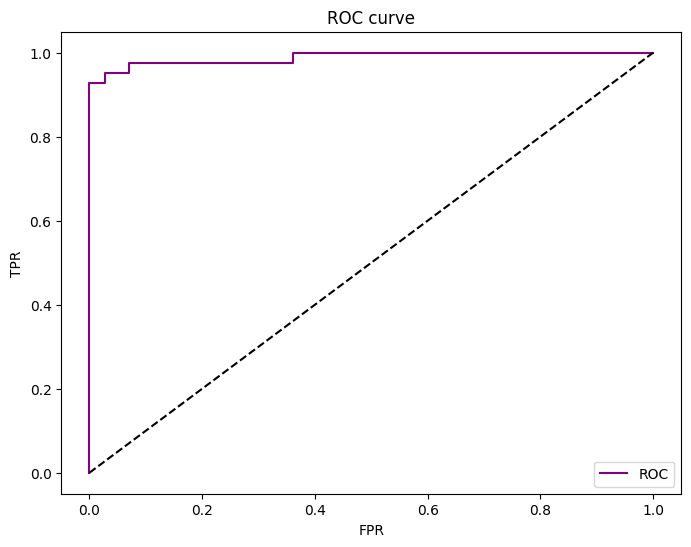

In [ ]:
from sklearn.metrics import roc_curve
FPR, TPR, thresholds =roc_curve(y_test,y_scores)
plt.figure(figsize = (8,6))
plt.plot(FPR, TPR, "purple", label="ROC")
plt.legend(loc = "lower right")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")


### AUC

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores)

0.9890873015873015